# Understanding the data:

## Packages to use:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading a sample data file to go though data:

In [9]:
df = pd.read_csv("sms-call-internet-mi-2013-11-01.txt", sep = "\t", header= None)

In [10]:
df.head()

,0,1,2,3,4,5,6,7
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
2,1,1383261000000,0,0.136588,NaN,NaN,0.027300,NaN
3,1,1383261000000,33,NaN,NaN,NaN,NaN,0.026137
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963


### Columns names have to be changed to represent the data which is containing very well.

#### Problem 1: Columns aren't named well. 

In [11]:
columns = ["grid_square", "time", "cc", "sms_in", "sms_out", "call_in", "call_out", "internet"]

## Colums Names:
- Grid sqaure: The grid number number whose measurements are represented on the other columns.
- time: The epoch Unix format timestamp which is the number of microseconds since 1-1-1970, each time stamp is 10 minutes = 600000 micro seconds
- CC : The country code in which the CDRs( Call detaied records) was initiated.
- sms_in: The number of sms CDRs that was entering the grid square agrregated along the timestamp.
- sms_out: The number of sms CDRs that was sent from the grid square agrregated along the timestamp.
- sms_in: The number of call CDRs that was entering the grid square agrregated along the timestamp.
- sms_out: The number of calls CDRs that was sent from the grid square agrregated along the timestamp.
- sms_in: The number of internet CDRs that was entering the grid square agrregated along the timestamp.

In [12]:
df.columns = columns

## Grouping data:
The file that was loaded represents the measurements during one day(144 time stamp), so to validate this assumption,, When grouping the data with time and grid squares we must get a length of the data = num_grid*num_of_timestamps and our data must be  = 10000 * 144 = `1,440,000` in this day 

In [13]:
#Grouping the data with time and grid square
grouped = df.groupby(["time", "grid_square"])

In [14]:
# Getting a list of the groups and get their length:
groups = grouped.groups.keys()

In [15]:
groups = list(groups)
len(groups)

1439982

Our Assumption tends to be true because the number is pretty close to the number that we have expected.

## Inspecting the Country code columns:

If the measurments was taken inside italy only we expect to find the country code of italy to be the only one there to represent the traffic that was initiated inside Italy.

In [16]:
# Geeting all Country codes:
print(np.sort(df.cc.unique()))

[    0     1     7    20    27    30    31    32    33    34    36    39
    40    41    43    44    45    46    47    48    49    51    52    53
    54    55    56    57    58    60    61    62    63    64    65    66
    81    82    84    86    90    91    92    93    94    95    98   211
   212   213   216   218   220   221   222   223   224   225   226   227
   228   229   230   231   232   233   234   235   236   237   238   239
   240   241   242   243   244   245   247   248   249   250   251   254
   255   256   257   258   260   261   262   263   264   265   266   267
   290   291   297   298   350   351   352   353   354   355   356   357
   358   359   370   371   372   373   374   375   376   377   378   379
   380   381   382   385   386   387   389   420   421   423   500   502
   503   504   505   506   507   509   590   591   593   594   595   596
   598   599   675   676   677   690   852   853   855   856   870   880
   886   960   961   962   963   964   965   966   

As we can see there are many country codes there that means that this is a roaming measurments not only local ones, that seems logical because Italy is am European country which means that the roaming feature is enabledm in addition to be a touristic country, especially, the City of Interest which Is Milan.

### Effect of Roaming Data on measurements:

in the next couple lines of code, we are trying to know and visulaize how much this data that was initiated outside Italy - Roaming Data - affects our global pattern of data:

In [17]:
# Summing Internet CDRs Among all country codes to get the whole Mesaurments including the Roaming ones:
roaming_internet = df.groupby(["time", "grid_square"])[["internet"]].sum()

In [18]:
# Presenting the Data:
roaming_internet.head()

internet
time          grid_square           
1383260400000 1            11.028366
              2            11.058225
              3            11.090008
              4            10.941881
              5             9.916548

Now It's time to plot the data of roaming Vs The local internet CDRs: 

In [19]:
# Getting All CDRs inside one grid square among all Country codes:
roaming_internet =roaming_internet.reset_index()
roaming_internet = roaming_internet.groupby("grid_square")

In [20]:
roaming_internet.head()

,time,grid_square,internet
0,1383260400000,1,11.028366
1,1383260400000,2,11.058225
2,1383260400000,3,11.090008
3,1383260400000,4,10.941881
4,1383260400000,5,9.916548
...,...,...,...
49995,1383262800000,9996,51.147670
49996,1383262800000,9997,50.005736
49997,1383262800000,9998,50.398211
49998,1383262800000,9999,32.289851


In [21]:
#Getting Italy Traffic with country code of 39 ==> Italy Country code.
italy_df = df[df["cc"] == 39]

In [22]:
italy_df.head()

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
6,1,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
8,1,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
10,1,1383262800000,39,0.243378,0.192891,0.053438,0.080738,8.009927


In [23]:
italy_df.shape

(1439981, 8)

In [24]:
#Grouping Italy data with Grid Square:
italy_df_grids  =italy_df.groupby("grid_square")

In [25]:
#Grouping measurements with country codes to investigate it:
ccs = df.groupby(["cc"])

In [26]:
codes = list(ccs.groups)

In [27]:
# Getting the mesuremtent that was intitiated inside Coountry code 0:
ccs.get_group(codes[0])

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
0,1,1383260400000,0,0.081363,NaN,NaN,NaN,NaN
2,1,1383261000000,0,0.136588,NaN,NaN,0.0273,NaN
5,1,1383261600000,0,0.053438,NaN,NaN,NaN,NaN
7,1,1383262200000,0,0.026137,NaN,NaN,NaN,NaN
9,1,1383262800000,0,0.027300,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4842609,9999,1383343200000,0,0.144481,NaN,NaN,NaN,NaN
4842612,9999,1383343800000,0,0.151707,NaN,NaN,NaN,NaN
4842615,9999,1383344400000,0,0.085995,NaN,NaN,NaN,NaN
4842618,9999,1383345000000,0,0.088767,NaN,NaN,NaN,NaN


In [28]:
# How many measurements are there ?
len(ccs.get_group(codes[5])["time"].unique())

126

In [29]:
# Getting the mesuremtent that was intitiated inside Coountry code 1:
ccs.get_group(codes[1])

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
340,1,1383345000000,1,0.026137,NaN,NaN,NaN,NaN
679,10,1383345000000,1,0.028653,NaN,NaN,NaN,NaN
860,100,1383299400000,1,NaN,NaN,NaN,NaN,0.079859
878,100,1383301800000,1,0.079859,NaN,NaN,NaN,NaN
905,100,1383304800000,1,NaN,NaN,NaN,NaN,0.040774
...,...,...,...,...,...,...,...,...
4840469,9994,1383301200000,1,NaN,NaN,NaN,NaN,0.005528
4841067,9995,1383331200000,1,0.011077,NaN,NaN,NaN,NaN
4841144,9995,1383345600000,1,NaN,NaN,NaN,NaN,0.011077
4841498,9996,1383331200000,1,0.003400,NaN,NaN,NaN,NaN


In [30]:
# Getting the mesuremtent that was intitiated inside Coountry code 3:
ccs.get_group(codes[3])

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
157,1,1383306000000,20,NaN,NaN,NaN,0.078412,NaN
163,1,1383306600000,20,NaN,NaN,NaN,0.001787,NaN
167,1,1383307200000,20,NaN,NaN,NaN,0.104550,NaN
186,1,1383310800000,20,NaN,NaN,NaN,0.053438,NaN
199,1,1383313200000,20,NaN,NaN,NaN,0.026137,NaN
...,...,...,...,...,...,...,...,...
4842497,9999,1383320400000,20,NaN,NaN,NaN,0.144481,NaN
4842550,9999,1383330600000,20,NaN,NaN,NaN,0.085995,NaN
4842586,9999,1383338400000,20,NaN,NaN,NaN,0.085995,NaN
4842602,9999,1383341400000,20,0.171990,NaN,NaN,NaN,NaN


In [31]:
# Itally Measuremenst:
ccs.get_group(39)

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
6,1,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
8,1,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
10,1,1383262800000,39,0.243378,0.192891,0.053438,0.080738,8.009927
...,...,...,...,...,...,...,...,...
4842614,9999,1383343800000,39,0.316471,0.201405,0.014708,0.505940,21.370823
4842617,9999,1383344400000,39,0.237047,0.883670,0.186697,0.438452,21.788302
4842619,9999,1383345000000,39,1.065164,0.586571,0.303670,0.144481,19.047994
4842622,9999,1383345600000,39,0.646086,0.550928,NaN,0.014708,16.453566


As the data is a roaming data it was expected that the roaming measrements were captured in a limited time stamps in a limited grid square as we can see there is a huge difference between the measurements initiated inside Italy and the roaming traffic, which is alomst has a lot of missing data as the visitors may use one service only like calls or sms or internet before they changing their operator to a local one, or may be the reason is that not all grid sqaures which means sites or clusters in which there are roaming traffic. 

Text(0.5, 1.0, 'with and without Roaming internet for grid square 8000')

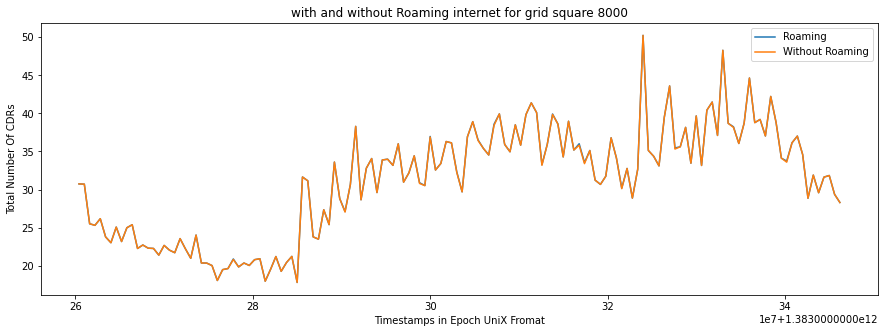

In [32]:
# Plotting:
roaming_grid = roaming_internet.get_group(8000)
plt.figure(figsize = (15,5))
plt.plot(roaming_grid["time"], roaming_grid["internet"],label = "Roaming")
plt.plot(italy_df_grids.get_group(8000)["time"], italy_df_grids.get_group(8000)["internet"], label = "Without Roaming")
plt.xlabel("Timestamps in Epoch UniX Fromat")
plt.ylabel("Total Number Of CDRs")
plt.legend()
plt.title("with and without Roaming internet for grid square 8000")

Text(0.5, 1.0, 'with and without Roaming internet for grid square 5158')

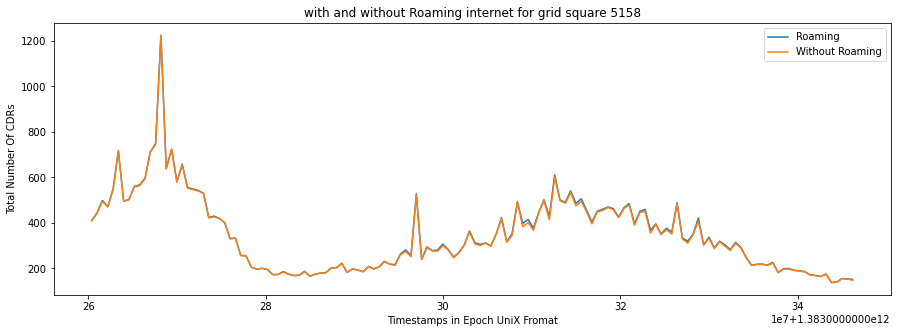

In [33]:
#Plot 2:
roaming_grid = roaming_internet.get_group(5158)
plt.figure(figsize = (15,5))
plt.plot(roaming_grid["time"], roaming_grid["internet"],label = "Roaming")
plt.plot(italy_df_grids.get_group(5158)["time"], italy_df_grids.get_group(5158)["internet"], label = "Without Roaming")
plt.xlabel("Timestamps in Epoch UniX Fromat")
plt.ylabel("Total Number Of CDRs")
plt.legend()
plt.title("with and without Roaming internet for grid square 5158")

Text(0.5, 1.0, 'with and without Roaming internet for grid square 150')

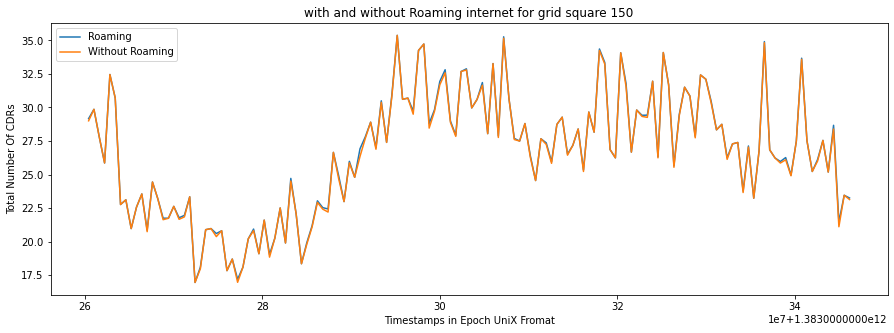

In [34]:
#plot 3
roaming_grid = roaming_internet.get_group(150)
plt.figure(figsize = (15,5))
plt.plot(roaming_grid["time"], roaming_grid["internet"],label = "Roaming")
plt.plot(italy_df_grids.get_group(150)["time"], italy_df_grids.get_group(150)["internet"], label = "Without Roaming")
plt.xlabel("Timestamps in Epoch UniX Fromat")
plt.ylabel("Total Number Of CDRs")
plt.legend()
plt.title("with and without Roaming internet for grid square 150")

If our assumtion is true (There is a roaming traffic), if we grouped the italy data with time and grid sqaures the shape of the data mustn't be changed, because we have only one measurement in one time interval inside a grid square with the same CC

In [35]:
time_italy = italy_df.groupby(["time", "grid_square"])

In [36]:
time_italy.head()

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet
1,1,1383260400000,39,0.141864,0.156787,0.160938,0.052275,11.028366
4,1,1383261000000,39,0.278452,0.119926,0.188777,0.133637,11.100963
6,1,1383261600000,39,0.330641,0.170952,0.134176,0.054601,10.892771
8,1,1383262200000,39,0.681434,0.220815,0.027300,0.053438,8.622425
10,1,1383262800000,39,0.243378,0.192891,0.053438,0.080738,8.009927
...,...,...,...,...,...,...,...,...
4842614,9999,1383343800000,39,0.316471,0.201405,0.014708,0.505940,21.370823
4842617,9999,1383344400000,39,0.237047,0.883670,0.186697,0.438452,21.788302
4842619,9999,1383345000000,39,1.065164,0.586571,0.303670,0.144481,19.047994
4842622,9999,1383345600000,39,0.646086,0.550928,NaN,0.014708,16.453566


the same shape means our assumption is true and from All this plots we can see that the roaming data isn't contributing a lot to the number of CDRs so the roaming data is negligable, so in our analysis and modelling we can ignore this portion just to investigate the data was initiated inside Italy only, <b>now let's see the dominant CDRS.</b>

# CDRs Contributions on the data:

As we can see there are 5 different traffic types, and our mission now is to invesitgate the contribution of each type and visualize the dominant one and if there are any thing that we can ignore to make our modelling more simple, but without hurting the overall pattern of the data.

In [37]:
# Getting the means of all CDRS measurents:
means = time_italy[["sms_in", "sms_out", "call_in", "call_out", "internet"]].mean().mean()

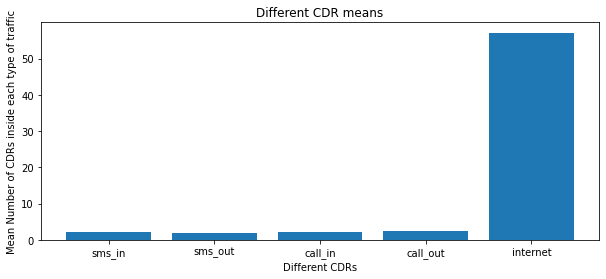

<Figure size 720x360 with 0 Axes>

In [38]:
# Plotting:
cdrs = ["sms_in", "sms_out", "call_in", "call_out", "internet"]
cdrs_means = [means["sms_in"],means["sms_out"],means["call_in"],means["call_out"],means["internet"]]
figure, ax = plt.subplots(figsize = (10,4))
ax.set_title("Different CDR means")
ax.set_xlabel("Different CDRs")
ax.set_ylabel("Mean Number of CDRs inside each type of traffic")
plt.figure(figsize = (10,5))
ax.bar(cdrs,cdrs_means );

From This graph is appears that the dominiant here is the internet traffic CDRs, but if we ignore the other traffic types this may hurt the patter of the seasonlity of the time series, and this can hurt our modelling process, so to ensure that is available we have to plot the the traffic with all CDRs and the traffic only represented by Number of internet CDRs.

In [39]:
# Summing all CDRs together:
italy_df["All_CDRs"] = italy_df[["sms_in","sms_out","call_in","call_out","internet"]].sum(axis = 1)

<ipython-input-39-51c575e7e32c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_df["All_CDRs"] = italy_df[["sms_in","sms_out","call_in","call_out","internet"]].sum(axis = 1)


In [40]:
italy_df_grids.get_group(8000)

,grid_square,time,cc,sms_in,sms_out,call_in,call_out,internet,All_CDRs
3812894,8000,1383260400000,39,0.905946,0.760753,0.208343,0.275917,30.738995,32.889953
3812896,8000,1383261000000,39,0.542084,1.989580,0.068107,0.229212,30.702518,33.531502
3812898,8000,1383261600000,39,0.222572,0.902609,0.011188,0.187290,25.500292,26.823951
3812901,8000,1383262200000,39,0.359372,0.971347,0.141152,0.011212,25.295824,26.778906
3812903,8000,1383262800000,39,0.432617,1.363386,NaN,0.338331,26.164231,28.298565
...,...,...,...,...,...,...,...,...,...
3813397,8000,1383343800000,39,0.442877,0.599646,0.072827,0.394587,29.580634,31.090570
3813401,8000,1383344400000,39,0.193953,0.257311,0.190332,0.330073,31.627508,32.599178
3813403,8000,1383345000000,39,0.601832,0.673615,0.457826,0.003089,31.842031,33.578394
3813405,8000,1383345600000,39,0.912749,0.644858,0.078379,0.008075,29.365815,31.009875


Text(0.5, 1.0, 'ALL CDRs VS Internet only for grid square 8000')

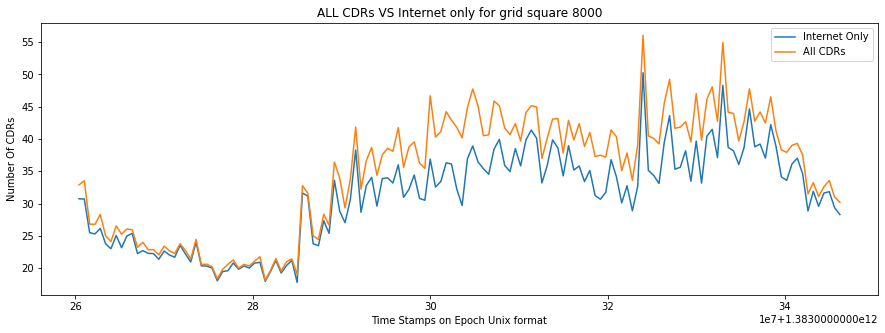

In [41]:
# Plotting:
plt.figure(figsize = (15,5))
plt.plot(italy_df_grids.get_group(8000)["time"], italy_df_grids.get_group(8000)["internet"],label = "Internet Only")
plt.plot(italy_df_grids.get_group(8000)["time"], italy_df_grids.get_group(8000)["All_CDRs"], label = "All CDRs")
plt.xlabel("Time Stamps on Epoch Unix format")
plt.ylabel("Number Of CDRs")
plt.legend()
plt.title("ALL CDRs VS Internet only for grid square 8000")

Text(0.5, 1.0, 'ALL CDRs VS Internet only  for grid square 5158')

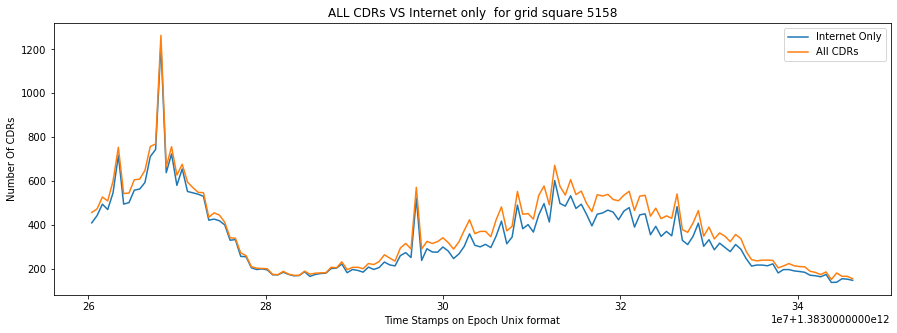

In [42]:
plt.figure(figsize = (15,5))
plt.plot(italy_df_grids.get_group(5158)["time"], italy_df_grids.get_group(5158)["internet"],label = "Internet Only")
plt.plot(italy_df_grids.get_group(5158)["time"], italy_df_grids.get_group(5158)["All_CDRs"], label = "All CDRs")
plt.xlabel("Time Stamps on Epoch Unix format")
plt.ylabel("Number Of CDRs")
plt.legend()
plt.title("ALL CDRs VS Internet only  for grid square 5158")

Text(0.5, 1.0, 'ALL CDRs VS Internet only  for grid square 150')

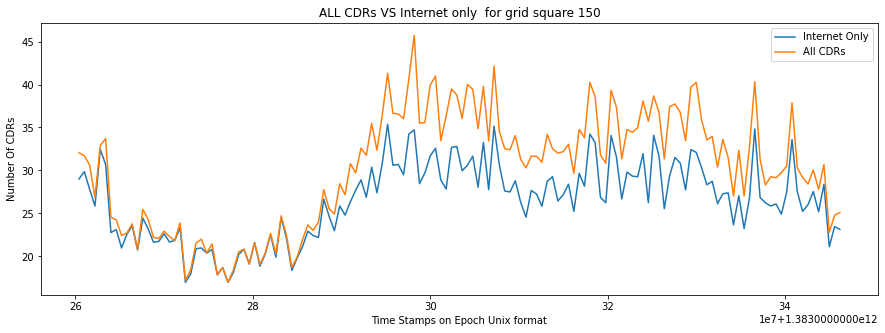

In [43]:
plt.figure(figsize = (15,5))
plt.plot(italy_df_grids.get_group(150)["time"], italy_df_grids.get_group(150)["internet"],label = "Internet Only")
plt.plot(italy_df_grids.get_group(150)["time"], italy_df_grids.get_group(150)["All_CDRs"], label = "All CDRs")
plt.xlabel("Time Stamps on Epoch Unix format")
plt.ylabel("Number Of CDRs")
plt.legend()
plt.title("ALL CDRs VS Internet only  for grid square 150")

As We Can see that the pattern of the internet traffic is not only the dominant magitude but also represents the data very well as its behavior is the main behavoir in the data, so in our analysis and modelling we can assume that the traffic is only the internet traffic and ignore all other traffic types.